# 机器学习 练习1 - 线形回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


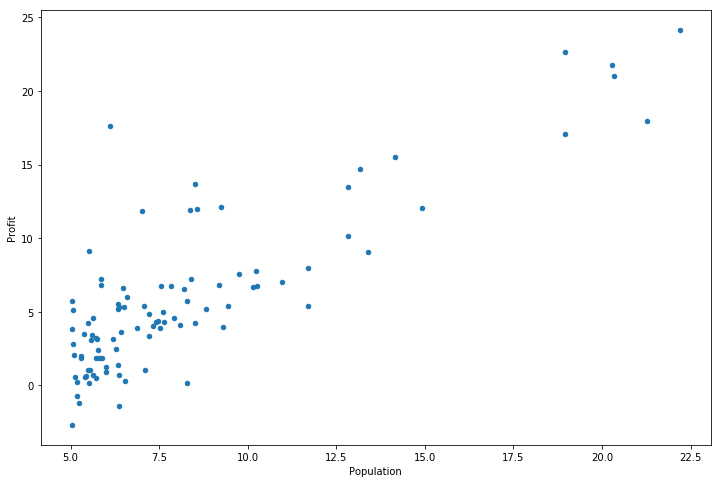

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

In [5]:
data.insert(0, 'Ones', 1)

In [6]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
cols = data.shape[1]
X = data.iloc[:, 0: cols-1]
y = data.iloc[:, cols-1:cols]

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0.0, 0.0]))

In [11]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
def compute_cost(X, y, theta):
    cost = np.power((X * theta.T - y), 2)
    return np.sum(cost) / (2 * X.shape[0])

In [13]:
compute_cost(X, y, theta)

32.072733877455676

## 批梯度下降

In [14]:
def gradient_descent(X, y, theta, alpha, iters):
    tmp = theta
    paras = theta.shape[1]
    cost = np.zeros(iters)

    for i in range(iters):
        err = X * theta.T - y
        for j in range(paras):
            term = np.sum(np.multiply(err, X[:,j]))
            tmp[0, j] = theta[0, j] - (alpha / X.shape[0]) * term
        theta = tmp
        cost[i] = compute_cost(X, y, theta)
    return theta, cost

In [15]:
alpha = 0.01
iters = 1000

In [16]:
g, cost = gradient_descent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [17]:
compute_cost(X, y, g)

4.515955503078912

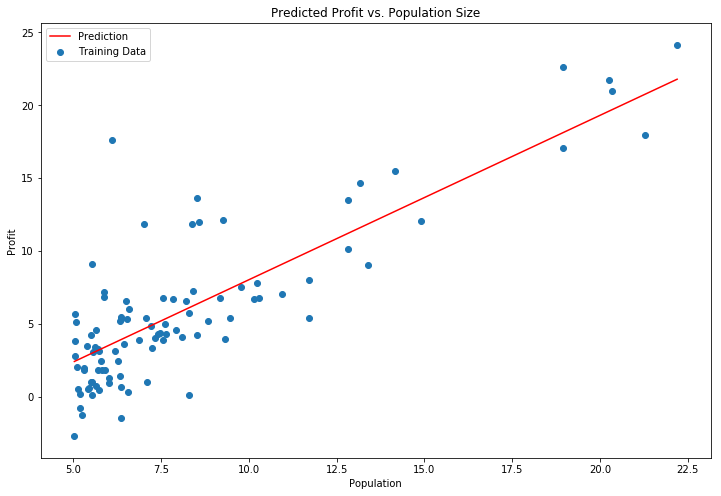

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + g[0, 1] * x

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend()
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

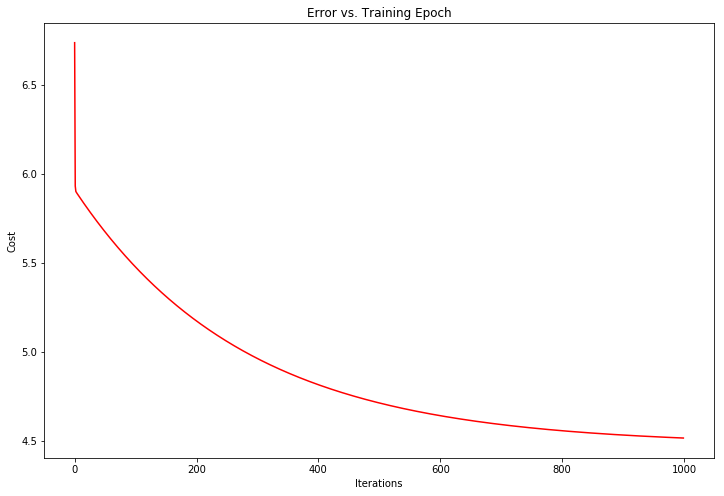

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 多变量线性回归

In [20]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [22]:
data2.insert(0, 'Ones', 1)
cols = data2.shape[1]

X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0.0,0.0,0.0]))

g2, cost2 = gradient_descent(X2, y2, theta2, alpha, iters)

compute_cost(X2, y2, g2)

0.13070336960771892

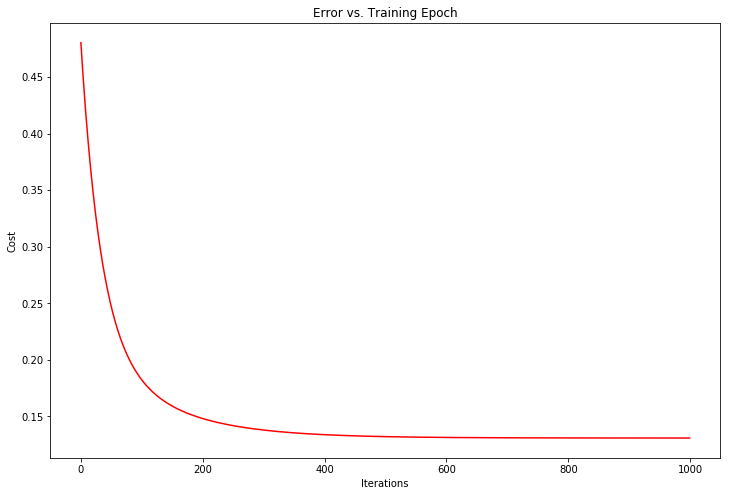

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [24]:
from sklearn import linear_model

In [25]:
model = linear_model.LinearRegression()
model.fit(X[:,1], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

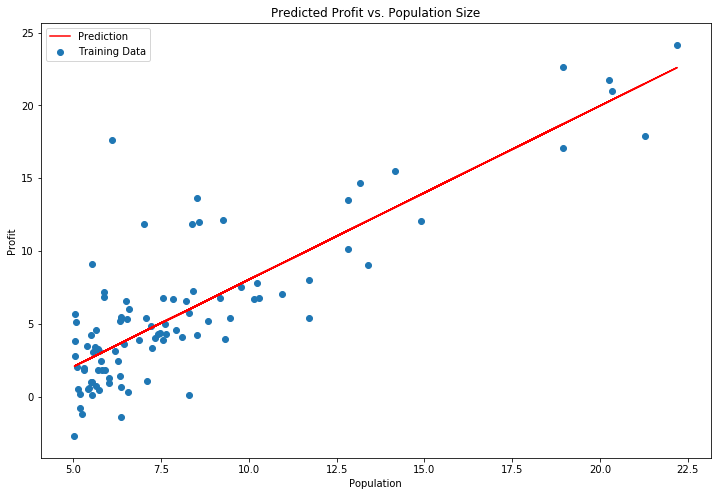

In [26]:
x = np.array(X[:, 1].A1)
f = model.predict(X[:,1]).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend()
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## 正规方程

In [27]:
def normal_eq(X, y):
    return np.linalg.inv(X.T * X) * X.T * y

In [28]:
final_theta2 = normal_eq(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [29]:
model.intercept_, model.coef_

(array([-3.89578088]), array([[1.19303364]]))